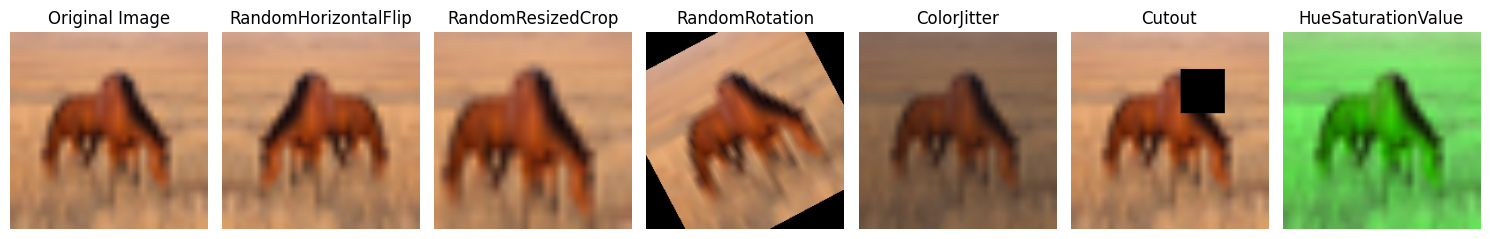

In [2]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from PIL import Image
import random
import numpy as np

# 데이터 경로
data_dir = "C:/Users/jongcheol/OneDrive/바탕 화면/Semester2/train_data"

# 기본 변환 (Resize + ToTensor)
transform_original = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 증강 기법 정의
def cutout(image, hole_size=50):
    """Cutout: 이미지 중앙에 정사각형 구멍을 추가."""
    image = np.array(image)
    h, w, c = image.shape
    mask = np.ones((h, w, c), dtype=np.uint8)

    # 구멍 위치 계산
    y = random.randint(0, h - hole_size)
    x = random.randint(0, w - hole_size)
    mask[y:y + hole_size, x:x + hole_size, :] = 0

    # Cutout 적용
    image = image * mask
    return Image.fromarray(image)

augmentations = {
    "RandomHorizontalFlip": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=1.0),  # 항상 적용
        transforms.ToTensor()
    ]),
    "RandomResizedCrop": transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.6, 0.7)),
        transforms.ToTensor()
    ]),
    "RandomRotation": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(45),
        transforms.ToTensor()
    ]),
    "ColorJitter": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ColorJitter(brightness=0.5, contrast=0.5),
        transforms.ToTensor()
    ]),
    "Cutout": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda img: cutout(img)),
        transforms.ToTensor()
    ]),
    "HueSaturationValue": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ColorJitter(hue=0.3, saturation=0.3),
        transforms.ToTensor()
    ])
}

# 데이터셋 로드
dataset = datasets.ImageFolder(root=data_dir)

# 랜덤 이미지 선택 함수
def get_random_image(dataset):
    index = random.randint(0, len(dataset) - 1)
    image_path, label = dataset.samples[index]
    image = Image.open(image_path).convert("RGB")  # 이미지를 RGB로 로드
    return image, label

# 비교 시각화 함수
def visualize_augmentations_in_row(image, augmentations, transform_original):
    num_columns = len(augmentations) + 1  # 원본 + 증강 개수
    fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))
    
    # 원본 이미지 처리
    original_image = transform_original(image)
    axes[0].imshow(original_image.permute(1, 2, 0).numpy())
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    # 증강 이미지 처리
    for i, (aug_name, aug_transform) in enumerate(augmentations.items(), start=1):
        augmented_image = aug_transform(image)  # PIL 이미지를 증강
        axes[i].imshow(augmented_image.permute(1, 2, 0).numpy())
        axes[i].set_title(f"{aug_name}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# 랜덤 이미지 불러오기
random_image, label = get_random_image(dataset)

# 시각화 실행
visualize_augmentations_in_row(random_image, augmentations, transform_original)


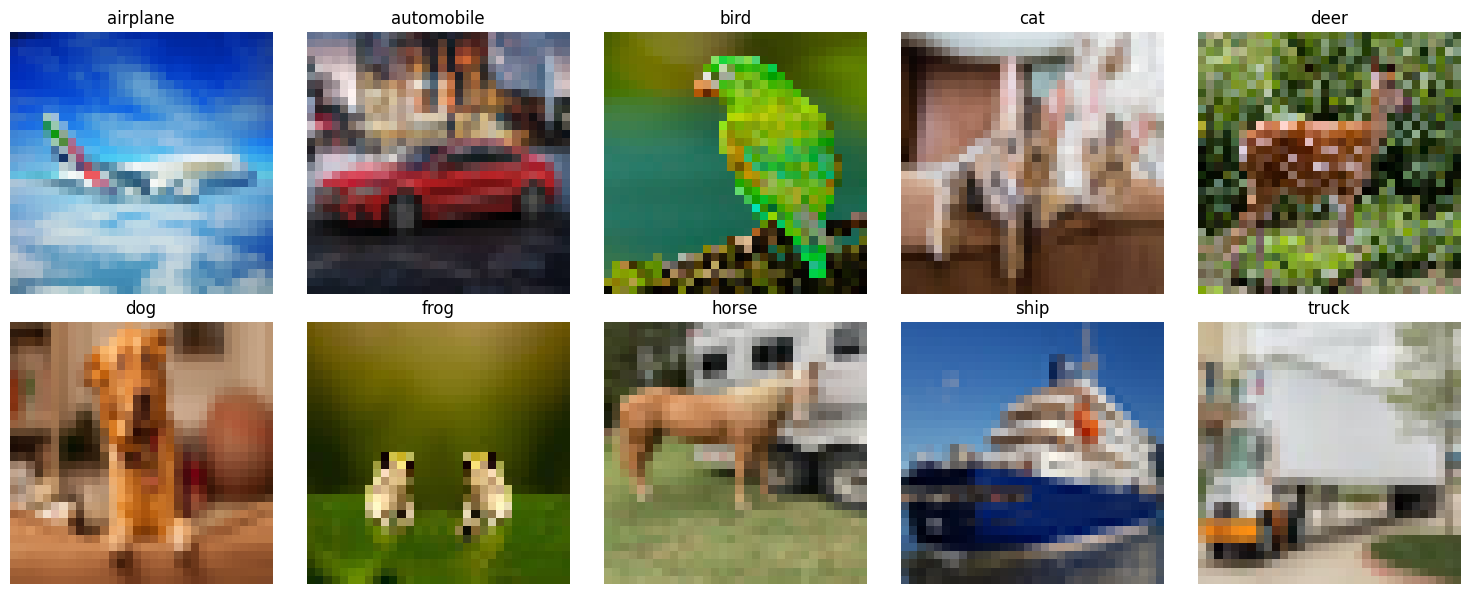

In [16]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets
from PIL import Image
import random

# 데이터 경로
data_dir = "C:/Users/jongcheol/OneDrive/바탕 화면/Semester2/train_data"

# 데이터셋 로드
dataset = datasets.ImageFolder(root=data_dir)

# 클래스별 샘플 선택 함수
def get_samples_per_class(dataset, num_samples=1):
    class_to_samples = {cls: [] for cls in dataset.classes}
    
    for path, label in dataset.samples:
        class_to_samples[dataset.classes[label]].append(path)
    
    selected_images = []
    for cls in dataset.classes:
        samples = random.sample(class_to_samples[cls], min(num_samples, len(class_to_samples[cls])))
        for sample in samples:
            selected_images.append((sample, cls))
    
    return selected_images

# 랜덤으로 클래스당 하나씩 총 10개의 이미지 선택
selected_images = get_samples_per_class(dataset, num_samples=1)

# 최대 10장만 선택
selected_images = selected_images[:10]

# 시각화
def visualize_images(images, num_cols=5):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols  # 행 계산
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
    axes = axes.flatten()  # 다차원 배열을 1D로 펼침
    
    for i, ax in enumerate(axes):
        if i < num_images:
            image_path, cls = images[i]
            image = Image.open(image_path).convert("RGB")
            ax.imshow(image)
            ax.set_title(cls)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# 시각화 실행
visualize_images(selected_images, num_cols=5)
